In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('model_data.csv')

In [3]:
df

,SEX,AGE,SEVERE,PNEUMONIA_1,PNEUMONIA_2,PNEUMONIA_3,PREGNANT_1,PREGNANT_2,PREGNANT_3,DIABETES_1,...,CARDIOVASCULAR_3,OBESITY_1,OBESITY_2,OBESITY_3,RENAL_CHRONIC_1,RENAL_CHRONIC_2,RENAL_CHRONIC_3,TOBACCO_1,TOBACCO_2,TOBACCO_3
0,1.0,0.719230,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2.0,0.608580,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2.0,0.752426,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.442603,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.708165,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391974,1.0,0.852011,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
391975,1.0,0.608580,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
391976,2.0,0.774556,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
391977,2.0,0.354083,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [4]:
X = df.drop(columns='SEVERE')
y = df['SEVERE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(10,), random_state=42, max_iter=300, early_stopping=True, verbose=True).fit(X_train, y_train)

Iteration 1, loss = 0.29817678
Validation score: 0.884339
Iteration 2, loss = 0.26798598
Validation score: 0.884116
Iteration 3, loss = 0.26513040
Validation score: 0.884084
Iteration 4, loss = 0.26420280
Validation score: 0.881756
Iteration 5, loss = 0.26363837
Validation score: 0.880577
Iteration 6, loss = 0.26319330
Validation score: 0.882904
Iteration 7, loss = 0.26283882
Validation score: 0.882649
Iteration 8, loss = 0.26265750
Validation score: 0.883925
Iteration 9, loss = 0.26244665
Validation score: 0.883447
Iteration 10, loss = 0.26232694
Validation score: 0.884212
Iteration 11, loss = 0.26215816
Validation score: 0.883829
Iteration 12, loss = 0.26208173
Validation score: 0.883957
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [6]:
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

In [7]:
print("Accuracy: %f" % accuracy_score(y_test, pred))
print("F1 score: %f" % f1_score(y_test, pred))
print("AUROC:    %f" % roc_auc_score(y_test, pred_prob[:,1]))
print("\n", classification_report(y_test, pred, target_names=["Low risk", "High risk"]))

Accuracy: 0.882762
F1 score: 0.599643
AUROC:    0.902358

               precision    recall  f1-score   support

    Low risk       0.92      0.94      0.93     66221
   High risk       0.64      0.57      0.60     12175

    accuracy                           0.88     78396
   macro avg       0.78      0.75      0.77     78396
weighted avg       0.88      0.88      0.88     78396



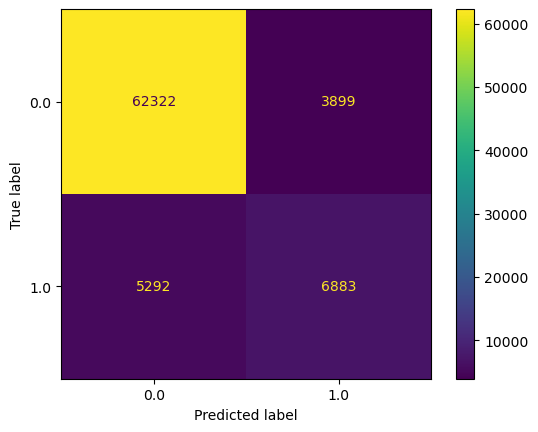

In [8]:
cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [9]:
pred_prob[:,1]

array([0.01610265, 0.13106887, 0.02526339, ..., 0.03640729, 0.01610265,
       0.13519514])

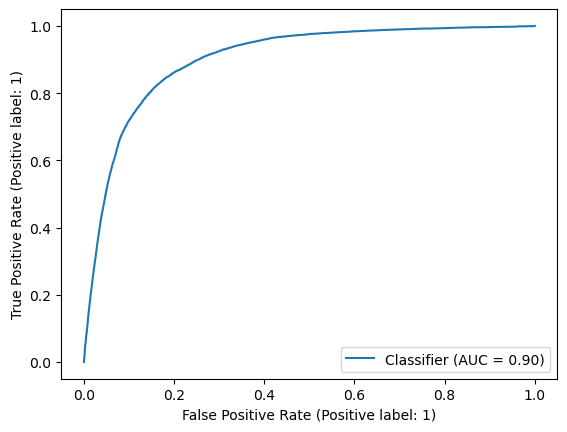

In [10]:
RocCurveDisplay.from_predictions(y_test, pred_prob[:,1])
plt.show()

In [11]:
thresh = []; sens = []; spec = []; s_s = []; f1 = []; acc = []

for i in range(1,100):
    thr = i/100
    cr = classification_report(y_test, (pred_prob[:,1]>thr).astype(int), output_dict=True, zero_division=0)
    thresh.append(thr)
    sens.append(cr['1.0']['recall'])
    spec.append(cr['0.0']['recall'])
    s_s.append(cr['1.0']['recall'] + cr['0.0']['recall'])
    f1.append(cr['1.0']['f1-score'])
    acc.append(cr['accuracy'])

thresh_df = pd.DataFrame({'Threshold': thresh, 'Sensitivity': sens, 'Specificity': spec,
                          'Sens_Spec_Sum': s_s, 'F1 Score': f1, 'Accuracy': acc})

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
thresh_df

,Threshold,Sensitivity,Specificity,Sens_Spec_Sum,F1 Score,Accuracy
0,0.01,1.000000,0.000000,1.000000,0.268850,0.155301
1,0.02,0.995811,0.142462,1.138273,0.299041,0.274989
2,0.03,0.985791,0.374353,1.360143,0.365870,0.469310
3,0.04,0.971170,0.539089,1.510259,0.433741,0.606192
4,0.05,0.949979,0.633107,1.583087,0.481545,0.682318
5,0.06,0.930021,0.689993,1.620013,0.514366,0.727269
6,0.07,0.912444,0.725978,1.638422,0.536278,0.754936
7,0.08,0.896756,0.751710,1.648466,0.552321,0.774236
8,0.09,0.882546,0.770858,1.653404,0.564131,0.788203
9,0.10,0.869569,0.787666,1.657234,0.575021,0.800385


In [14]:
thresh_df.idxmax()

Threshold        98
Sensitivity       0
Specificity      94
Sens_Spec_Sum    12
F1 Score         38
Accuracy         49
dtype: int64

<Axes: >

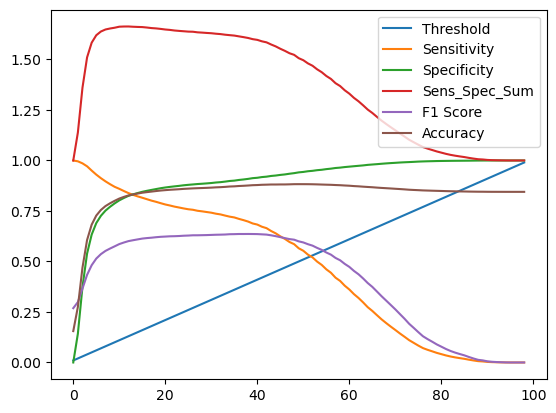

In [15]:
thresh_df.plot()

In [26]:
# Using a threshold of 0.12
print(classification_report(y_test, (pred_prob[:,1]>0.10), target_names=["Low risk", "High risk"], zero_division=0))

              precision    recall  f1-score   support

    Low risk       0.97      0.79      0.87     66221
   High risk       0.43      0.87      0.58     12175

    accuracy                           0.80     78396
   macro avg       0.70      0.83      0.72     78396
weighted avg       0.89      0.80      0.82     78396



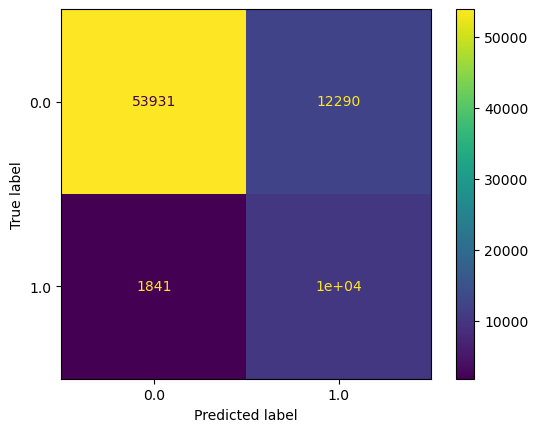

In [36]:
# Using a threshold of 0.10
cm = confusion_matrix(y_test, (pred_prob[:,1]>0.12), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [37]:
clf.coefs_

[array([[-5.65248998e-02,  4.08400679e-01,  2.29608708e-01,
          9.00665560e-03, -1.50821241e-01, -2.05748266e-01,
         -3.50884153e-01,  3.45320579e-01,  9.66727504e-02,
          1.03154644e-01],
        [ 3.50628671e-01, -2.57020427e-01, -3.66906830e-01,
         -1.22590057e-01, -8.42579044e-01,  4.89799628e-01,
          2.75531399e-01, -5.98969500e-01,  6.92365958e-01,
         -1.92094281e-01],
        [ 3.89389915e-01, -5.33232224e-01, -4.42261982e-01,
         -8.38928175e-02, -3.85178603e-01,  5.80490967e-01,
          6.64001776e-02, -2.60490901e-01,  3.96549259e-01,
         -3.08064825e-01],
        [-2.53728225e-01,  3.03039430e-03, -7.89553660e-02,
          2.78280126e-01,  6.02463121e-01, -8.82222455e-02,
         -2.60094855e-01, -5.62912536e-02, -1.24468070e-01,
         -8.73073704e-02],
        [-6.14702475e-02,  6.04392272e-02,  5.96660363e-02,
          9.66920523e-06,  6.14127219e-02, -6.14268472e-02,
         -6.12783159e-02,  6.05885722e-02, -3.811455

In [39]:
len(clf.coefs_)

2

In [40]:
len(clf.coefs_[0]), len(clf.coefs_[1])

(38, 10)

In [41]:
len(clf.coefs_[0][0])

10

In [42]:
clf.intercepts_

[array([-0.23380677,  0.26076739,  0.18895094,  0.2129032 ,  0.29737288,
         0.21145987, -0.19156987, -0.10951618,  0.19672158,  0.17136342]),
 array([-0.68587958])]

In [43]:
len(clf.intercepts_)

2

In [44]:
len(clf.intercepts_[0]), len(clf.intercepts_[1])

(10, 1)